<a href="https://colab.research.google.com/github/icarocarmona/tech_challenge_f1/blob/main/notebooks/Analise_IC_MacroV2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# adicionar aqui as importações
import pandas as pd
import locale

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/trusted/dados_de_vinhos.csv', sep=';')

In [3]:
df

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação
3,Vietnã,0,0,1970,Brasil,Espumantes,Exportação
4,Líbano,0,0,1970,Brasil,Espumantes,Exportação
...,...,...,...,...,...,...,...
25276,Guiana Francesa,0,0,2022,Brasil,Uvas,Exportação
25277,Guadalupe,0,0,2022,Brasil,Uvas,Exportação
25278,Georgia,0,0,2022,Brasil,Uvas,Exportação
25279,Gana,0,0,2022,Brasil,Uvas,Exportação


In [4]:
df.value_counts('Tipo Vinho')

Tipo Vinho
Vinho De Mesa    6784
Uvas             6731
Sucos            6413
Espumantes       5353
dtype: int64

In [5]:
pip install seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Filtro por tipo de vinho (Vinho De Mesa)
tipo_de_vinho = 'Vinho De Mesa'
df_filtrado = df[df['Tipo Vinho'] == tipo_de_vinho]

# Nova seção
 A história do vinho no Brasil:


 https://blog.famigliavalduga.com.br/a-historia-do-vinho-no-brasil-conheca-a-trajetoria-da-bebida-em-territorio-nacional/

Na década de 1970, o Marketing começou a se tornar uma preocupação entre os nossos produtores, que aproveitaram o renome do vinho europeu para criar rótulos mais bonitos e com nomes franceses e alemães. Nessa época, houve um boom no consumo de vinho no país, seguindo a tendência global.

Nos anos 1980, começam a surgir as primeiras confrarias do vinho, com degustações, periódicos e informações para os enófilos de todo o país. O consumo de vinho fino começou a crescer, mesmo que devagar, junto com uma população de consumidores informados e exigentes.

Na década seguinte, o plano Real facilitou a importação de vinhos do mundo todo, permitindo ao brasileiro conhecer os mais variados rótulos das principais regiões vinícolas do planeta, além de fomentar mais uma vez o desenvolvimento da indústria nacional pela concorrência.

O século XXI começou com boas perspectivas para o vinho no Brasil: a safra de 1999 teve reputação de ter sido uma das melhores produzidas por aqui até então. Nos anos 2000, o país continuou a se desenvolver nesse sentido, com tecnologias cada vez mais sofisticadas e preocupação crescente com a qualidade dos vinhos nacionais.

Em 2002, as vinícolas da região do Vale dos Vinhedos, na Serra Gaúcha, chegaram a receber do Instituto Nacional da Propriedade Industrial (INPI) o direito de ter um selo de identificação de procedência geográfica! Foi o primeiro passo em direção à cobiçada denominação de origem, além de garantir mais qualidade para as garrafas produzidas ali devido às exigências do selo.

In [8]:
df_99 = df_filtrado[(df_filtrado['Ano'] == 1999)][['Quantidade (L)','Valor U$']].sum()
df_99.head()

Quantidade (L)    6765937
Valor U$          4074292
dtype: int64

In [9]:
df_filtrado_2 = df_filtrado[df_filtrado['Ano'].isin([1999,2000, 2001, 2002])]
soma_valores = df_filtrado_2.groupby('Ano')[['Quantidade (L)','Valor U$']].sum()
df_soma_anos = soma_valores.reset_index()
df_soma_anos.columns = ['Ano','Soma de Quantidade (L)' ,'Soma de Valor U$']

df_soma_anos

,Ano,Soma de Quantidade (L),Soma de Valor U$
0,1999,6765937,4074292
1,2000,6288613,3463277
2,2001,2654582,1313229
3,2002,2250037,1082939


In [10]:
df_soma_anos[df_soma_anos['Ano'] == 1999]['Soma de Valor U$']

0    4074292
Name: Soma de Valor U$, dtype: int64

In [11]:
df_soma_anos['Variação Vl Pct'] = df_soma_anos['Soma de Valor U$'].pct_change() * 100
df_soma_anos['Variação Qtd Pct'] = df_soma_anos['Soma de Quantidade (L)'].pct_change() * 100
df_soma_anos.head()


,Ano,Soma de Quantidade (L),Soma de Valor U$,Variação Vl Pct,Variação Qtd Pct
0,1999,6765937,4074292,NaN,NaN
1,2000,6288613,3463277,-14.996839,-7.054810
2,2001,2654582,1313229,-62.081318,-57.787480
3,2002,2250037,1082939,-17.536165,-15.239499



chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://sistema.semead.com.br/10semead/sistema/resultado/trabalhosPDF/563.pdf


O comportamento das exportações de vinho no período de 2000-2006, através de análise descritiva de dados secundários do Ministério do Desenvolvimento, Indústria e Comércio Exterior (MDIC/SECEX). Os dados indicam que através do programa de incentivo às exportações e o esforço conjunto de vinícolas brasileiras ocorreu significativo aumento das exportações nos últimos 3 anos, com expansão de vendas de vinhos finos de varietais européias. A pauta de países compradores também ampliou-se de 16 para 41, indicando que novos consumidores externos estão adquirindo e conhecendo o vinho brasileiro.

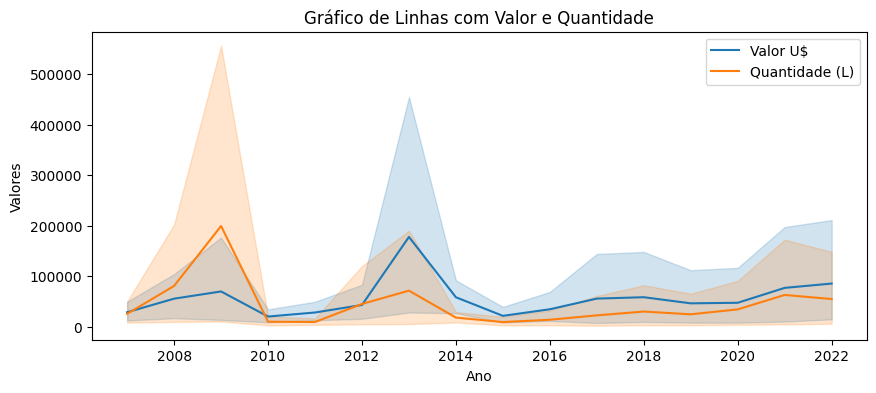

In [12]:
anos = list(range(2007, 2023))
df_6_anos = df_filtrado[df_filtrado['Ano'].isin(anos)]

# Defina o tamanho da figura
plt.figure(figsize=(10, 4))

# df_6_anos.head()

ax = sns.lineplot(data=df_6_anos, x='Ano', y='Valor U$', label='Valor U$')
ax = sns.lineplot(data=df_6_anos, x='Ano', y='Quantidade (L)', label='Quantidade (L)')

# Defina rótulos e legendas
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Gráfico de Linhas com Valor e Quantidade')
plt.legend()

# Exiba o gráfico
plt.show()




https://revistaadega.uol.com.br/artigo/o-mercado-de-vinhos-importados-no-brasil_9189.html


Os países exportadores apresentaram o seguinte quadro ao fim de 2008:




1º CHILE
Mais uma vez, mantendo sua hegemonia no mercado brasileiro, com impressionante participação de 34,38% e 30,68% respectivamente em volumes e valores, mais com crescimento de apenas 6,44% sobre 2007.
___


In [13]:
filtro = (df_filtrado['Ano'].isin([2008])) & (df_filtrado['Valor U$'] > 0)
df_08 = df_filtrado[filtro]
df_08 = df_08.sort_values('Valor U$', ascending=False).reset_index()

total_valores = df_08['Valor U$'].sum()
df_08['Participação'] = (df_08['Valor U$'] / total_valores) * 100
df_08.head(5)

,index,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Participação
0,10217,Rússia,6207658,2352768,2008,Brasil,Vinho De Mesa,Exportação,33.053315
1,10218,Paraguai,2191901,1374088,2008,Brasil,Vinho De Mesa,Exportação,19.304140
2,10219,Estados Unidos,443895,804607,2008,Brasil,Vinho De Mesa,Exportação,11.303677
3,10220,Países Baixos,340412,783635,2008,Brasil,Vinho De Mesa,Exportação,11.009047
4,10221,"Alemanha, República Democrática",265742,429970,2008,Brasil,Vinho De Mesa,Exportação,6.040516


In [14]:
filtro = (df_filtrado['Ano'].isin([2007])) & (df_filtrado['Valor U$'] > 0)
df_08 = df_filtrado[filtro]
df_08 = df_08.sort_values('Valor U$', ascending=False).reset_index()

total_valores = df_08['Valor U$'].sum()
df_08['Participação'] = (df_08['Valor U$'] / total_valores) * 100
df_08.head(10)

,index,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Participação
0,10089,Estados Unidos,479269,810038,2007,Brasil,Vinho De Mesa,Exportação,21.975177
1,10090,Paraguai,1285459,801519,2007,Brasil,Vinho De Mesa,Exportação,21.744069
2,10091,Países Baixos,181046,364751,2007,Brasil,Vinho De Mesa,Exportação,9.895175
3,10092,Japão,357943,316867,2007,Brasil,Vinho De Mesa,Exportação,8.596150
4,10093,"Alemanha, República Democrática",119512,238052,2007,Brasil,Vinho De Mesa,Exportação,6.458012
5,10094,"Tcheca, República",85303,189620,2007,Brasil,Vinho De Mesa,Exportação,5.144121
6,10095,Rússia,266400,173160,2007,Brasil,Vinho De Mesa,Exportação,4.697584
7,10096,Portugal,109074,165282,2007,Brasil,Vinho De Mesa,Exportação,4.483865
8,10097,Reino Unido,84613,144244,2007,Brasil,Vinho De Mesa,Exportação,3.913134
9,10098,Suíça,26090,70716,2007,Brasil,Vinho De Mesa,Exportação,1.918424


<Figure size 1000x600 with 0 Axes>

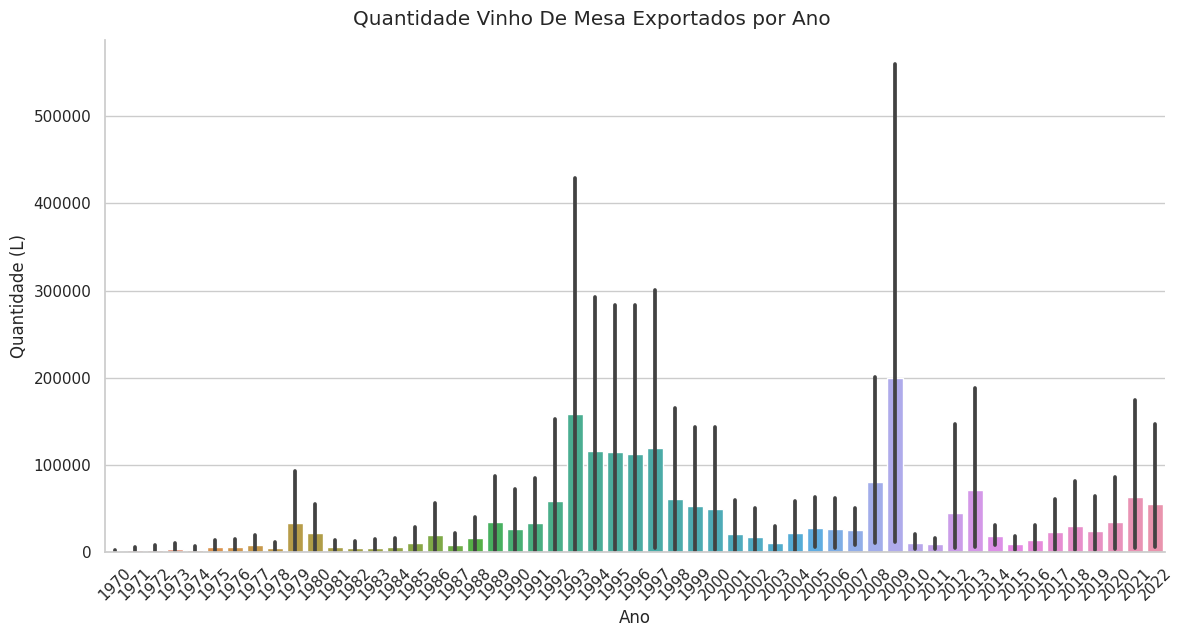

In [15]:
# Crie um gráfico usando Seaborn catplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.catplot(data=df_filtrado, x='Ano', y='Quantidade (L)', kind='bar', height=6, aspect=2)
g.fig.suptitle(f'Quantidade {tipo_de_vinho} Exportados por Ano', y=1.02)
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Rotacionar os rótulos dos anos para torná-los mais legíveis
g.set_xticklabels(rotation=45)

plt.show()

In [16]:

tabela = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/Producao.csv', sep=';')

In [17]:
# Suponhamos que você tenha um DataFrame chamado "tabela" com os dados
# Vamos usar o método "melt" para reorganizar a tabela

# Primeiro, crie uma lista de anos das colunas da tabela
anos = [str(ano) for ano in range(1970, 2023)]

# Use o método "melt" para transformar a tabela
tabela_melted = tabela.melt(id_vars=["id", "produto"], value_vars=anos, var_name="Ano", value_name="Quantidade (L)")

# Agora, você tem uma tabela tidy que pode ser usada para criar gráficos
print(tabela_melted.head())


   id                        produto   Ano  Quantidade (L)
0   1                  VINHO DE MESA  1970       217208604
1   2                          Tinto  1970       174224052
2   3                         Branco  1970          748400
3   4                         Rosado  1970        42236152
4   5  VINHO FINO DE MESA (VINÍFERA)  1970        23899346


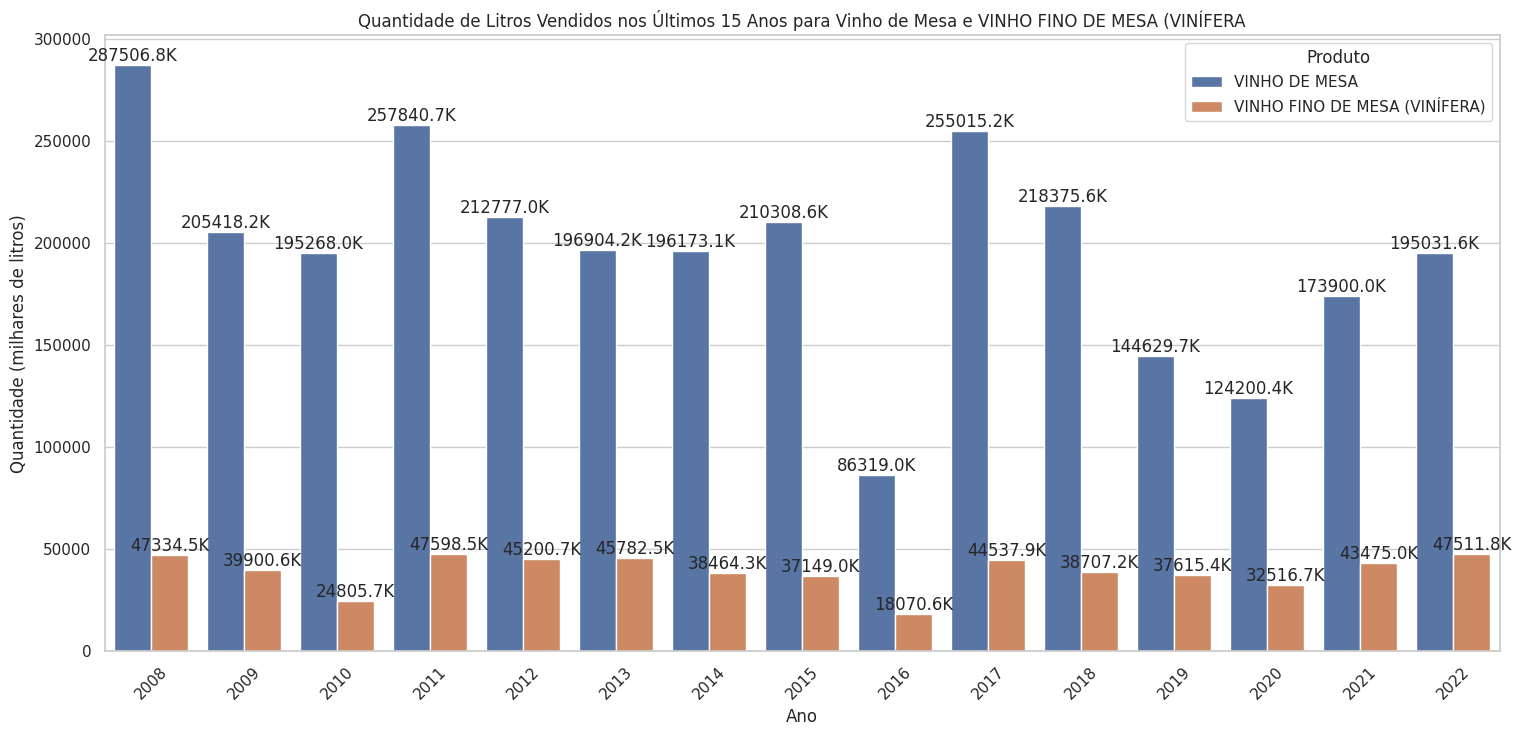

In [ ]:

# Suponhamos que você tenha uma tabela_melted com os dados reorganizados

# Filtrar linhas para "Vinho de Mesa" e "Rosado"
produtos_desejados = tabela_melted[tabela_melted['produto'].isin(["VINHO DE MESA", "VINHO FINO DE MESA (VINÍFERA)"])]

# Filtrar apenas os 15 anos mais recentes
anos_recentes = [str(ano) for ano in range(2008, 2023)]  # 2008 a 2022
produtos_desejados = produtos_desejados[produtos_desejados['Ano'].isin(anos_recentes)]

# Normalizar as quantidades (dividir por 1.000)
produtos_desejados.loc[:, 'Quantidade (L)'] = produtos_desejados['Quantidade (L)'] / 1000

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=produtos_desejados, x="Ano", y="Quantidade (L)", hue="produto")

# Adicionar rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.title("Quantidade de Litros Vendidos nos Últimos 15 Anos para Vinho de Mesa e VINHO FINO DE MESA (VINÍFERA")
plt.xlabel("Ano")
plt.ylabel("Quantidade (milhares de litros)")
plt.xticks(rotation=45)
plt.legend(title="Produto")

plt.show()


In [21]:
### representação de Uruguai, Paraguai e China em 2022
recomendacao = list(['Uruguai', 'Paraguai' , 'China'])
df_22 = df_filtrado[df_filtrado['Ano'] == 2022]

total_venvido_22 = df_22['Valor U$'].sum()
display(total_venvido_22)

df_filtrado_22 = df_22[df_22['Destino'].isin(recomendacao)]
total_venvido_pelos_3 = df_filtrado_22['Valor U$'].sum()
display(total_venvido_pelos_3)


percentagem = (total_venvido_pelos_3 / total_venvido_22) * 100

# Exiba o resultado
print(f"China, Paraguai e Uruguai representam {percentagem:.2f}% do total.")





10945282

8558307

China, Paraguai e Uruguai representam 78.19% do total.


In [ ]:
mesa = produtos_desejados[produtos_desejados['produto'] == 'VINHO DE MESA']
    fino = produtos_desejados[produtos_desejados['produto']
                              == 'VINHO FINO DE MESA (VINÍFERA)']

    # st.table(fino)
    # st.table(mesa)

    fig2 = go.Figure()
    fig2.add_trace(go.Bar(
        x=anos_recentes,
        y=fino['Quantidade (L)'],
        name='Vinho Fino',
        marker_color='rgb(194,8,90)'
    ))
    fig2.add_trace(go.Bar(
        x=anos_recentes,
        y=mesa['Quantidade (L)'],
        name='Vinho de Mesa',
        marker_color='rgb(113,47,121)'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig2.update_layout(title_text='Quantidade de Litros produzidos nos Últimos 15 Anos de Vinho de Mesa e Vinho Fino (VINÍFERA)',
                       barmode='group', xaxis_tickangle=-45)
    # st.plotly_chart(fig2, use_container_width=True)

IndentationError: ignored

In [ ]:
paises = df_filtrado['Destino'].unique()


In [ ]:
produtos_desejados.head()

In [ ]:
df_sem_zero = df_filtrado[df_filtrado['Quantidade (L)'] > 0]
df_sem_zero.query("Ano==2022").head()

In [ ]:
# ajusta nome dos paises
df_sem_zero.loc[df_sem_zero['Destino'] == 'Países Baixos', 'Destino'] = 'Países Baixos (Holanda)'


In [ ]:
df_sem_zero.query("Ano==2022").head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
12009,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação
12010,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação
12011,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação
12012,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação
12013,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação


In [ ]:
country = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/countries-with-regional-codes.csv')
country.head(5)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [ ]:
paises = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/pais.csv', encoding='latin-1', sep=';')
paises.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [ ]:
df_completo = df_sem_zero.merge(paises, left_on='Destino', right_on='NO_PAIS',how='left')
df_completo.query("Ano==2022").head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
1192,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,586.0,600.0,PRY,Paraguai,Paraguay,Paraguay
1193,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,845.0,858.0,URY,Uruguai,Uruguay,Uruguay
1194,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,341.0,332.0,HTI,Haiti,Haiti,Haiti
1195,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,249.0,840.0,USA,Estados Unidos,United States,Estados Unidos
1196,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,160.0,156.0,CHN,China,China,China


In [ ]:
df_completo = df_completo.merge(country, left_on='CO_PAIS_ISON3', right_on='country-code', how='left')
df_completo.query("Ano==2022").head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
1192,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,586.0,600.0,PRY,...,PY,PRY,600.0,ISO 3166-2:PY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1193,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,845.0,858.0,URY,...,UY,URY,858.0,ISO 3166-2:UY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1194,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,341.0,332.0,HTI,...,HT,HTI,332.0,ISO 3166-2:HT,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1195,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,249.0,840.0,USA,...,US,USA,840.0,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
1196,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,160.0,156.0,CHN,...,CN,CHN,156.0,ISO 3166-2:CN,Asia,Eastern Asia,NaN,142.0,30.0,NaN


<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

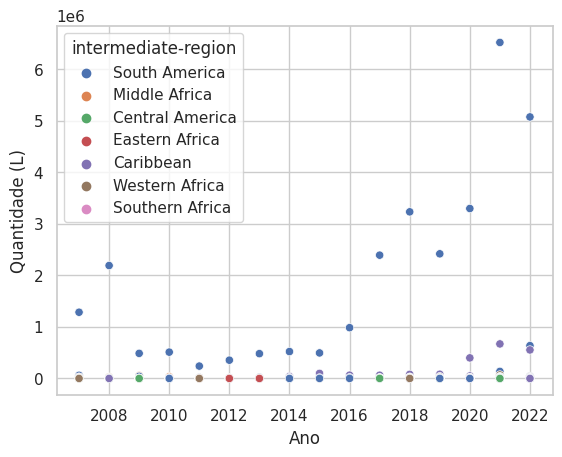

In [ ]:
sns.scatterplot(data=df_completo.query("Ano>=2007"), x='Ano', y='Quantidade (L)', hue='intermediate-region')

In [ ]:
df_completo.query("Ano>=2022").sort_values('Quantidade (L)', ascending=False).head(10)

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
1192,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,586.0,600.0,PRY,...,PY,PRY,600.0,ISO 3166-2:PY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1193,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,845.0,858.0,URY,...,UY,URY,858.0,ISO 3166-2:UY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1194,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,341.0,332.0,HTI,...,HT,HTI,332.0,ISO 3166-2:HT,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1195,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,249.0,840.0,USA,...,US,USA,840.0,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
1196,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,160.0,156.0,CHN,...,CN,CHN,156.0,ISO 3166-2:CN,Asia,Eastern Asia,NaN,142.0,30.0,NaN
1198,Rússia,66046,118618,2022,Brasil,Vinho De Mesa,Exportação,676.0,643.0,RUS,...,RU,RUS,643.0,ISO 3166-2:RU,Europe,Eastern Europe,NaN,150.0,151.0,NaN
1201,Curaçao,40673,66950,2022,Brasil,Vinho De Mesa,Exportação,200.0,531.0,CUW,...,CW,CUW,531.0,ISO 3166-2:CW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1200,Japão,37324,82208,2022,Brasil,Vinho De Mesa,Exportação,399.0,392.0,JPN,...,JP,JPN,392.0,ISO 3166-2:JP,Asia,Eastern Asia,NaN,142.0,30.0,NaN
1204,Gana,35949,49304,2022,Brasil,Vinho De Mesa,Exportação,289.0,288.0,GHA,...,GH,GHA,288.0,ISO 3166-2:GH,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0
1205,Bolívia,32530,49011,2022,Brasil,Vinho De Mesa,Exportação,97.0,68.0,BOL,...,BO,BOL,68.0,ISO 3166-2:BO,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0


In [ ]:
import plotly.express as px
df = px.data.gapminder()

# fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
fig = px.scatter(df_completo.query('Ano>=2007'), x='Ano', y="Quantidade (L)",
                size='Valor U$', color='region',
                 hover_name="name", log_x=True, size_max=60)
fig.show()


In [ ]:
top_10 = df_completo.query('Ano==2008')

sns.lineplot(top_10, )


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df['Quantidade (L)'])))


# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([

                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="-"
    )
)

fig.show()

